
<img src='https://docs.google.com/drawings/d/e/2PACX-1vS6qydI5uYdzS6jV_kN6s11CZnsXt8WL5T68xdjJGFnBSfQVZMLJgMCsAY0KhyHvTCnviIu65GBBjI2/pub?w=960&h=720'>

# **Chapter One Notebook Of Basic Concepts Of Fixed Income**

## ***A Road Map***

<ul type='dot'>
<li><font size=5>Bond Pricing</li>

<ul tupe='dot'>
  <li>The Present Value Of A Bond</li>
  <li>Arbitrage And The Value Of A Bond</li>
  <li>Continuous And Discrete Compounding</li>
  </ul>
<li>NumPy Arrays</li>
<ul tupe='dot'>
  <li>Element-By-Element Calculations</li>
  <li>Creating One- and Two-Dimensional Arrays</li>
  <li>Converting NumPy Arrays To Panda DataFrames</li>
</ul>
<li>Term Structure</li>
<ul tupe='dot'>
  <li>Spot Rates Of Interest</li>
  <li>Forward Rates Of Interest</li>
</ul>
<li>Calculating The Term Structure</li>
<ul tupe='dot'>
  <li>Creating A DataFrame From A CSV File</li>
  <li>Creating A DataFrame From An Excel File</li>
  <li>Creating A DataFrame From An URL Address</li>
  <li>Calculating Spot And Forward Rates From T-Bill Prices</li>


### Chapter One uses the libraries Pandas and NumPy. The basic usage of these libraries are<br> discussed in two separate notebooks.  The notebook [A Quick Introduction To Pandas](https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_Pandas.html)<br> reviews some basic concepts of Pandas.  The notebook [A Quick Introduction To NumPy](https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_NumPy.html)<br> does the same for NumPy.


### ***Python for Bonds and Interest Rates***
#### In this chapter, we'll explore bond calculations and interest through the lens of NumPy And Python DataFrames. Powerful tools for engaging bond data. Using Treasury bill data, we'll learn how to create DataFrames and NumPy arrays from CSV files, Excel workbooks. All our data is accessed with external URLs. Our calculations result in the term structure of interest rates on two different data. The chapter concludes with an exercise in which you practice calculating and graphin the term structure of interest rates on your own.


### ***Introduction to Bond Pricing***
#### This chapter will introduce some fundamental principles of fixed income. These principles include pricing coupon bonds as a portfolio of zero-coupon bonds, the term structure of interest rates, and the relation between spot and forward rates of interest.

### ***The Present Value of a Bond***
#### Chapter Two of *Basic Financial and Python Concepts* asserted that the value of an asset with certain cash flows equals the present value of its cash flows, as shown in the following equation:

$$\Large Value = \sum_{t=1}^{T}Cash\,Flow_t\times PV(t)$$
#### where $\ T$ is the total number of cash flow periods, and $\ PV(t)$ is the present-value factor for a certain cash flow in period $t$.


#### In finance, equating value with present value is ubiquitous and seems unworthy of much thought. It is, however, a powerful statement that value depends upon the ability to replicate an asset with other assets. Namely, if an asset's cash flow dates and amounts can be replicated by another asset or combinations of assets, the values must be equal. You might call this idea the ***law of one price***&mdash;a concept that is key in all pricing models.

### ***Coupon Bonds and Zero-Coupon Bonds***
#### Most bonds, but not all, pay fixed coupons in each period and principal at their maturity. The values of coupon bonds are calculated as:


$$\large Coupon\, Bond= \sum_{t=1}^{T}Coupon_t\times PV(t)+ Principal_T\times PV(T)$$

#### Some bonds only repay principal at maturity, or $T$. Because there are no periodic coupon payments, these bonds are appropriately known as zero-coupon bonds. The values of zero-coupon bonds are calculated as:

$$\large Zero\,Coupon\, Bond =Principal_T\times PV(T)$$

#### In order to price any bond, it's necessary to know the present value of payments at the relevant dates. If the zero-coupon bond values are known for the relevant dates, the present value of each date can be determined. To do so, divide the value of the zero-coupon bond by its principal, as shown below:

 $$\large  PV(t)=\frac{Zero\,Coupon\, Bond_t }{Principal_t}$$

#### Each coupon-bond cash flow is equivalent to an investment in a zero-coupon bond. As such, we can replicate a coupon bond with a sequence of zero-coupon bonds: The number of zero-coupon bonds with a maturity of $t$ equals the coupon bond's cash flow at $t$ divided by the zero-coupon bond's principal. For example, consider a $\$40$ coupon that is paid every six months before maturity. This coupon is valued with a sequence of 0.04 zero-coupon bonds, with a $\$1,000$ principal and maturities matching the coupon payment dates. The coupon bond's payment at maturity equals 1.040 zero-coupon bonds, with a $\$1,000$ principal and the same maturity as the coupon bond.

#### Further, a coupon bond's value is the sum of all the zero-coupon bond values needed to replicate that bond's cash flows. If the coupon bond and the zero-coupon bonds have the same principal, and all the coupon payments of the coupon bond are equal, the value of the coupon bond is:

$$\large Value = \sum_{t=1}^{T}Zero\,Coupon\,Bond_t\times\frac{Coupon}{Principal}+Zero\,Coupon\,Bond_T$$

#### We define the sum  as:

$$\large S(T) =\sum_{t=1}^{T}\frac{Zero\,Coupon\,Bond_t}{Principal} = \sum_{t=1}^{T}PV(t)$$

#### And the value of the fixed-coupon bond is composed of two components equaling:


$$\large Value = S(T)\times Coupon+PV(T)\times Principal(T)$$

### ***Arbitrage and the Value of the Bond***
#### Thus far, bond values have been represented as the sum of the zero-coupon bonds' values. But we must consider the zero-coupon bonds' *market prices*&mdash;not their "theoretical" values. Will the value relation between zero-coupon and coupon bonds hold if we use the market prices of zero-coupon bonds? To answer that question, let's look at examples where the coupon bond is worth more or less than the sum of the zero-coupon bonds. First, consider a case where the coupon bond's price exceeds the sum of the zero-coupon bond prices:

 $$\large Value > S(T)\times Coupon+PV(T)\times Principal(T)$$

#### If the price of the coupon bond exceeds the sum of the zero-coupon bond prices, the coupon bond can be *shorted*.$^{1}$ The zero-coupon bonds can then be purchased with the proceeds, leaving the investor with identical cash flows for a lower price. Consider if the inequality is reversed:

 $$\large Value <  S(T)\times Coupon+PV(T)\times Principal(T)$$

#### In this case, the *zero-coupon bonds* can be shorted, and the proceeds can be used to buy the coupon bond. This ability to recreate cash flows allows for arbitrage between zero-coupon and coupon bonds; as a result, the coupon bond prices equal the costs of the zero-coupon bonds used to recreate their cash flows. It is the law of one price in action. Whatever the bond prices might have been in theory does not matter. Those prices were ideas&mdash;the market value is a fact.

#### This arbitrage relationship is important for deriving the *term of structure of interest rates* and *forward rates*, which we'll examine later in this chapter. These concepts are key to understanding bond pricing as well as some important fixed-income derivatives.



---

$^{1}$ The mechanics of shorting bonds will be discussed in future chapters.

### ***Continuous and Discrete Compounding***
#### For mathematical and computational convenience, our discussion of fixed income and bond pricing will use continuously compounded interest rates. At times, it's appropriate to quote interest rates as discretely compounded rates. To that end, this short aside demonstrates the conversion between continuously and discretely compounded rates.

#### Suppose that $R_c$ is the continuously compounded annual interest rate for $T$ periods, and $R_d$ is the discretely compounded annual rate for $T$ periods when compounded $d$ times per year. The conversion of continuously and discretely compounded rates requires that the same values are realized in $T$ periods, shown below:

$$\Large e^{R_c\times T}  =  (1 + \frac{R_d}{d})^{d\times T}$$

#### $e$ is Euler's number and is the limit of $(1+\frac{1}{d})^{d}$ as d goes to infinity or continously compounds.The necessary condition is expressed as an annualized interest rate by taking the $T$ root of both sides of the equation:

$$\Large e^{R_c} = (1 + \frac{R_d}{d})^{d}$$

#### Taking natural logs of the previous equation derives continuously compounded rates from discretely compounded rates:

$$\Large R_c = d\times ln(1 + \frac{R_d}{d})$$

#### Finally, discretely compounded rates can be derived from continuously compounded rates by dividing both sides by the compounding frequency, or
$$\Large \frac{R_c}{d} = ln(1 + \frac{R_d}{d})$$

#### and raising Euler's number, $e$, to both sides of the equation:

$$\Large R_d = d\times (e^\frac{R_c}{d} - 1)$$

#### For instances in which rate conversion is necessary, the above methods are useful knowledge; for this chapter, however, we'll focus on continuously compounded rates.



## ***Preparing The Notebook***

### ***Importing Libraries And Functions***
#### It's good practice to import all required libraries and modules in the first code cell of a notebook. A practice followed here unless attention is being drawn to a new function or module. If a library is already installed, it's imported to the notebook.  If a library is not installed, it is installed  and then imported.

#### The standard Python installation includes the first five imports: (<font color='green'>os, sys</font>, <font color='green'>requests</font>, <font color='green'>types</font>, and <font color='green'>datetime</font>).  <font color='green'>os</font> and <font color='green'>sys</font>  facilitate interaction with the operating system.  The <font color='green'>requests</font> module enables sending and retrieving data from external URL addresses; in this notebook, it's specifically used to access files from DropBox. The <font color='green'>types</font> module creates the module from the Python code accessed from DropBox.  Finally <font color='green'>datetime</font> allows for the creation and manipulation of date objects.

```
import os
import sys
import requests
from types import ModuleType
from datetime import date
```

#### NumPy and Pandas, though not standard Python libraries, are pre-installed in Colab and often in Jupyter notebooks. To ensure availability, a <font color='green'>try </font> and <font color='green'>except </font> block is used for importing them. If the import fails, the libraries are then installed using <font color='green'>pip </font>. The exclamation mark indicates that <font color='green'>pip </font> is running on the machine's console rather than within the notebook. Upon successful import, NumPy and Pandas are aliased as <font color='green'>np</font> and <font color='green'>pd </font>.$^{2}$

```
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd
```



---
$^{2}$<a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/Control_Statements.html#the-try-and-except'>try and except statements</a>.

In [ ]:
import os
import sys
import requests
from types import ModuleType
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd

### ***Adding a Custom Module and Importing Functions***

#### Now that we've imported our main modules and libraries, we'll access a custom module for our more specific functions. In the below code, the custom module <font color='green'>module_basic_concepts_fixed_income</font> contains functions utilized by this notebook and others in the volume *Basic Concepts of Fixed Income*. This module is accessed from Dropbox using <font color='green'>requests.get()</font>.


#### You have the flexibility to choose the module name; in this instance, <font color='green'>module_basic_concepts_fixed_income</font> is assigned to <font color='green'>module_name</font>. Dropbox provides the URL for access. The module is instantiated with <font color='green'>ModuleType</font> (which we imported earlier) using the chosen <font color='green'>module_name</font>. Once created, the module becomes accessible in the Notebook's memory, though it is not added to a drive.
```
url= 'https://www.dropbox.com/scl/fi/4y5hjxlfphh1ngvbgo77q/\
module_-basic_concepts_fixed_income.py?rlkey=6oxi7mgka42veaat79hcv8boz&st=stuou11h&dl=1'
module_name='module_basic_concepts_fixed_income'
try:
  response=requests.get(url)
  module=ModuleType(module_name)

```
#### The <font color='green'>exec()</font> function below executes the Python code returned by <font color='green'>requests.get()</font>. It assigns functions and variables to <font color='green'>sys.module[module_name]</font>. This makes the module available for use in the Notebook.
```
exec(response.text,module.__dict__)
sys.module[module_name]=module
```
#### We'll then import two functions from the module: <font color='green'>parent_folder_subfolder</font> and <font color='green'>one_y_axis</font>. The former determines locations for saving and accessing files and can be <a href='https://patrickjhess.github.io/Imported-Functions/parent_folder_subfolder.html#parent-folder-subfolder-is-a-helper-function-for-saving-files-created-by-financial-python'>viewed here</a>. The latter plots calculation results and can be <a href='https://patrickjhess.github.io/Imported-Functions/one_y_axis.html#one-y-axis-is-a-helper-function-for-plotting-graphs-created-by-financial-python'>viewed here</a>.


```
from basic_concepts_fixed_income import(parent_folder_subfolder,
                                       one_y_axis)
```

#### Our now-complete code is shown in the cell below.

In [ ]:
# Define the URL of the Python module to be downloaded from Dropbox.
# The 'dl=1' parameter in the URL forces a direct download of the file content.
url= 'https://www.dropbox.com/scl/fi/4y5hjxlfphh1ngvbgo77q/\
module_-basic_concepts_fixed_income.py?rlkey=6oxi7mgka42veaat79hcv8boz&st=stuou11h&dl=1'
module_name='basic_concepts_fixed_income'
# Send an HTTP GET request to the URL and store the server's response.
try:
  response=requests.get(url)
  # Raise an exception for bad status codes (like 404 Not Found)
  response.raise_for_status()
  module= ModuleType(module_name)
  #Code contained in response.text executed
  exec(response.text, module.__dict__)
  # Module added to sys
  sys.modules[module_name]=module
except requests.exceptions.RequestException as e:
    print(f"❌ Error: Could not fetch module from URL. {e}")
except Exception as e:
    print(f"❌ Error: Failed to execute or import the module. {e}")
# Open the local file in "write binary" ('wb') mode and save the downloaded content.
# Using a 'with' statement ensures the file is properly closed after writing.

# Now that 'basic_concepts_fixed_income' exists in the notebook, import the specific functions
from basic_concepts_fixed_income import(parent_folder_subfolder,
                                        background_material,
                                        one_y_axis)

### ***NumPy Arrays***
#### The NumPy library offers efficient numerical procedures that simplify complex calculations.$^{3}$ The fundamental object in this library is the NumPy array. An array is simply a data structure in which elements are arranged and accessed. It can be formed from a single value or from an iterable data type like a list, which holds a series of values.$^{4}$ NumPy must be imported before use; recall that in this Notebook, it was imported and aliased as <font color='green'>np</font> in the first code cell. The <font color='green'>array()</font> method is used to convert variables into NumPy arrays.$^{5}$ The following code creates an array from the list <font color='green'>[3%, 5%, 7%]</font> (lists are stylized with square brackets) and assigns that array to <font color='green'>interest_rates</font>. This is then passed to <font color='green'>display()</font>, which simply displays the contents of <font color='green'>interest_rates</font>.


---


$^{3}$<a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_NumPy.html#numpy'>A Quick Introduction To NumPy </a>

$^{4}$<a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/A_First_Look_At_Lists.html#a-first-look-at-lists'>A First Look At Lists </a>

$^{5}$ Like other libraries the alias <font color='green'>np</font> need to proceed the method:  <font color='green'>np.arraay</font> instead of  <font color='green'>array</font>.

In [ ]:
interest_rates=np.array([0.03,0.05,0.07])
display(interest_rates)

array([0.03, 0.05, 0.07])

### ***NumPy Calculations***
#### Now that we've created an array and assigned it to <font color='green'>interest_rates</font>, we can perform calculations on that array. NumPy calculates array elements individually. For instance, the <font color='green'>exp()</font> method used below raises each element of <font color='green'>interest_rates</font> to Euler's number, $e$. This approach is faster and more convenient than iterating through the rates.

In [ ]:
display(np.exp(interest_rates))

array([1.03045453, 1.0512711 , 1.07250818])



### <font color='blue'>***Application: Create a NumPy Array***</font>
### <font color='blue'>***Create a NumPy array of the present value factors for the rates of*** <font color='green'>***interest_rates***</font></font>


[***Chapter One Hints: Create A NumPy Array***](https://patrickjhess.github.io/Hints-Results/Chapter_One_Hints.html#create-a-numpy-array).

[***Expected Results***](https://patrickjhess.github.io/Hints-Results/Chapter_One_Results.html#create-a-numpy-array)



### ***Two-Dimensional Numpy Arrays***
#### The <font color='green'>pv_rates</font> array, a two-dimensional NumPy array (or matrix), is created by combining two one-dimensional arrays: <font color='green'>interest_rates</font> and <font color='green'>pv_factors</font> within the <font color='green'>array()</font> method. To access the rows of this two-dimensional array, use the corresponding row index value. Both the interest rates and present value factors rows are displayed using f-strings that begins with an 'f' and enclose the string and variable in quotes.  The variable must also be encapsulated in curly brackets.


In [ ]:
#A calculation is make for each element of a numpy array
pv_factors=1/np.exp(interest_rates)
pv_rates=np.array([interest_rates,pv_factors])
display(pv_rates)
#Create an f string for each row.
#Each row must also be encapsulated in curly brackets
display(f'Interest Rates {pv_rates[0]}')
display(f'Present Value Factors {pv_rates[1]}')

array([[0.03      , 0.05      , 0.07      ],
       [0.97044553, 0.95122942, 0.93239382]])

'Interest Rates [0.03 0.05 0.07]'

'Present Value Factors [0.97044553 0.95122942 0.93239382]'



### <font color='blue'>***Application: Manipulate a Two-Dimensional Array***</font>

### <font color='blue'>***Create a two-dimensional array by raising the interest-rate row to Euler's number and multiplying the results by the present value factors.***</font>
[***Chapter One Hints: Manipulate A Two-Dimensional Array***](https://patrickjhess.github.io/Hints-Results/Chapter_One_Hints.html#manipulate-two-dimensional-array)

[***Expected Results***](https://patrickjhess.github.io/Hints-Results/Chapter_One_Results.html#manipulate-two-dimensional-array)



## ***Creating A Pandas DataFrame From NumPy Arrays***

### ***The Simple Example***
#### A Pandas DataFrame organizes data into rows and columns, much like a spreadsheet or a NumPy array. It can be created from a two-dimensional array, such as <font color='green'>pv-rates</font>. The simplest DataFrames automatically assign row and column index values, a more functional approach allows for explicit naming of both. In this simple example, the <font color='green'>DataFrame()</font> method of Pandas uses three arrays as arguments, generating a row for each array.


In [ ]:
# Dataframe created with DataFrame() method
simple_example=pd.DataFrame((interest_rates,
              np.exp(interest_rates),
              1/np.exp(interest_rates)))
display(simple_example)

,0,1,2
0,0.030000,0.050000,0.070000
1,1.030455,1.051271,1.072508
2,0.970446,0.951229,0.932394




### <font color='blue'>***Application: Create a DataFrame from a Two-Dimensional Array***</font>
### <font color='blue'>***Create a DataFrame with the two-dimensional array***</font> <font color='green'>***pv_rates***</font>.</font>
[***Chapter One Hints: Create A DataFrame From A Two-Dimensional Array***](https://patrickjhess.github.io/Hints-Results/Chapter_One_Hints.html#create-a-dataframe-from-a-two-dimensional-array).

[***Expected Results***](https://patrickjhess.github.io/Hints-Results/Chapter_One_Results.html#create-a-dataframe-from-a-two-dimensional-array)

### ***Making Rows into Columns and Labeling the Columns***
#### In the below code, rows are converted to columns by using the <font color='green'>transpose()</font> method on our earlier DataFrame, <font color='green'>simple_example</font>. This method changes the rows into columns.$^{6}$ The transposed result is then assigned to <font color='green'>rows_to_columns</font>, and the columns are then assigned the elements of a list (<font color='green'>['Rates', 'Future Value', 'Present Value']</font>).  Transposing the DataFrame makes <font color='green'>'Rates'</font>, <font color='green'>'Future Value'</font>, and <font color='green'>'Present Value'</font> the variables and the rows the observations of the variables.

---
$^{6}$ The method can be applied as <font color='green'>T</font>.  <a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_Pandas.html#the-transpose'>Quick Introduction To Pandas</a>



In [ ]:
#transpose the simple_example dataframe and call it rows_to_columns
rows_to_columns=simple_example.transpose()
#(the transpose method can also be written as simple_example.T)
rows_to_columns.columns=['Rates','Future Value','Present Value']
display(rows_to_columns)

,Rates,Future Value,Present Value
0,0.03,1.030455,0.970446
1,0.05,1.051271,0.951229
2,0.07,1.072508,0.932394


### ***The set_index() Method***
#### Once the DataFrame has been transposed, the next step is to make the <font color='green'>Rates</font> column the index.  You might wonder why it makes sense?  The reason is that the values of <font color='green'>Rates</font> determine the values of the columns <font color='green'>Future Value</font> and <font color='green'>Present Value</font>.  This change isn't necessary, but it draws our eye to a natural connection.  Instead of an index that only points to a row number, the new index points to the rate that causes the future and present values.


#### The method <font color='green'>set_index()</font> takes a column name and removes the column from the DataFrame. Pandas has a builtin **fail-safe-switch**. By default, this change (and others we will encounter later) does not permanently alter the DataFrame.  You might find this a bit strange, but the efficacy avoids mistakes that are difficult to fix. To make the change permanent you assign <font color='green'>inplace</font> switch True.$^{7}$



*   #### Assign the transposed value of the DataFrame to another DataFrame:


```
name_index_set_index=rows_to_columns.set_index('Rates')
display(name_index_set)
display(rows_to_columns)
```


*   Change the default value of the <font color='green'>inplace</font>  argument  of <font color='green'>set_index</font>  to True
```
rows_to_columns.set_index('Rates',inplace=True)
display(rows_to_columns)
```

---
$^{7}$ <a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_Pandas.html#making-a-column-the-index'>A Quick Introduction To Pandas</a>



In [ ]:
name_index_set_index=rows_to_columns.set_index('Rates')
display(name_index_set_index)
display(rows_to_columns)
rows_to_columns.set_index('Rates',inplace=True)
display(rows_to_columns)

,Future Value,Present Value
Rates,,
0.03,1.030455,0.970446
0.05,1.051271,0.951229
0.07,1.072508,0.932394


,Rates,Future Value,Present Value
0,0.03,1.030455,0.970446
1,0.05,1.051271,0.951229
2,0.07,1.072508,0.932394


,Future Value,Present Value
Rates,,
0.03,1.030455,0.970446
0.05,1.051271,0.951229
0.07,1.072508,0.932394


### ***The Term Structure Of Interest Rates: Putting NumPy And Pandas To Work***


#### The term structure of interest describes how interest rates vary over time. It is a critical financial metric reflected in the pricing or valuation of almost all assets.
#### NumPy and Pandas are powerful tools that greatly simplify the manipulation and calculation of extensive and complex financial data. We will explore their application in calculating the term structure of interest rates on various dates, a process that requires accessing large datasets and performing numerous calculations. These libraries are essential for this task.


## ***The Term Structure of Interest Rates***

#### The earlier discussion of bond pricing described the price of a zero-coupon bond as its maturity value times the present value factor. A NumPy array and a Pandas DataFrame included interest rates, future values, and present value factors.  The same concepts are used to calculate the Term Structure Of Interest Rates (Term Structure).

### ***Spot Rates Of Interest***
#### The Term Structure is the relation between the annualized interest rates of zero-coupon bonds, or the spot rate of interest, and the bonds' maturities. The price of a zero-coupon bond with a maturity of $t$ and a principal of $1 is:

$$\Large P(t) = e^{ -r_t\times t}$$

#### The annualized continuously-compounded interest rate of the $t$-period zero-coupon bond is:

$$\Large r_t = \frac{-ln(P(t))}{t}$$
#### $r_t$ is known as the spot rate of interest for $t$ periods.
#### If a zero-coupon bond pays $\$1$ in six months and has a price of $0.9753, the continuously-compounded annual rate of interest is:

$$5\% = \frac{-ln(0.9753)}{0.5}$$

### ***Forward Rates Of Interest***
#### The forward rate of interest represents the additional return gained by extending an investment's duration&mdash;or the extra earnings from investing for two months instead of one. When two bonds offer an identical single payment at maturity, the forward rate between the shorter and longer maturities is determined by the ratio of their respective prices.

#### For zero-coupon bonds with a principal of $\$1$, the calculation of one plus the forward rate between $t$ and $t+\Delta t$  is:


$$\Large\frac{\frac{1}{P(t+\Delta t)}}{\frac{1}{P(t)}}= e^{f(t,t+\Delta t)\times\Delta t}$$


$$\large\frac{P(t)}{P(t+\Delta t)}= e^{f(t,t+\Delta t)\times\Delta t}$$

#### The continuously-compounded annualized forward rate between $t$ and $t+\Delta t$ is:



$$\large f(t,t+\Delta t) = \frac{ln(P(t)) - ln(P(t+\Delta t))}{\Delta t}$$

#### The forward rates can be locked in by purchasing the zero-coupon bond that matures in $\large t+\Delta t$ periods and for $t$ periods, borrowing $P(t+\Delta t)$ today at the rate $P(t)^{-1}.$  At $t$, the borrowing is repaid, and at $t +\Delta t$, the zero-coupon matures and pays one dollar. The borrowing, repayment, and locked-in rate-of-return calculations are shown below.

$$\large Amount\,Borrowed =P(t+\Delta t)$$
$$\large Repayment = P(t+\Delta t)\times\frac{1}{P(t)}$$
$$\large Locked\,In\,Rate\,of\,Return = \frac{1}{\frac{P(t+\Delta t)}{P(t)}}-1 =\frac{P(t)}{P(t+\Delta t)}-1$$

#### The continuously-compounded annualized locked-in rate of return equals:

$$\large\frac{ln(P(t)) -ln(P(t+\Delta t))}{\Delta t}.$$

#### This value is the same as the continuously-compounded forward rate of interest between $t$ and  $\ t+\Delta t$.

#### Although it might seem obvious that the locked-in rate of return and the forward rate are equal, this result is significant. Imagine an investor who intends to invest at the future date $t$ for $\Delta t$ periods. The investor can

1.   #### wait until $t$ to invest at the unknown spot rate $\ r(t,t+\Delta t)$, or
2.   #### lock in a rate of return today that equals the current forward rate $\ f(t,t+\Delta t)$.

#### In a state of equilibrium, the prices of zero-coupon bonds ensure that investors are indifferent to either securing a spot rate immediately or deferring investment until a future, unknown spot rate. The choice between rolling over a short-term investment and making a long-term one essentially hinges on expectations regarding future interest rates. Similar to the odds in a sports wager, the forward rate represents a fair-bet value for these future unknown spot rates, thereby making investors indifferent to the duration of their investment. Although forward rates forecast future spot rates, the forecasts may not be the expected values.$^{8}$



---
 $^{8}$ This statement presumes that future spot rates are uncertain. If future spot rates are known, forward rates will equal future spot rates.



## ***Calculating the Term Structure of Interest Rates with Treasury Bills***
#### Treasury bills, or T-bills, mature in a year or less and make a single principal payment at maturity. In this section, we'll apply the Python concepts we've learned so far to T-bill data, using the bills to demonstrate the term structure between one month and one year. Because the bills make a single payment, their prices are determined by the single spot rate of interest at maturity.

### ***Getting Treasury Bill Data***
#### Treasury bill data is available from the US Department of the Treasury (Treasury) at the department's <a href='https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates&field_tdr_date_value_month=202509'>"Daily Treasury Bill Rate"</a> page. The data used in this example is for September 2022 and was uploaded to DropBox as an Excel workbook.
### ***The Python & Financial Concepts***
#### This example outlines two Python concepts. First, it demonstrates how to leverage Pandas for accessing Excel workbooks from a URL and convert them into DataFrames—a highly effective skill given Excel's widespread use.  The Pandas method is <font color='green'>read_excel</font>.$^{9}$ Second, it illustrates data manipulation techniques using Pandas, specifically focusing on how <font color='green'>loc</font>, <font color='green'>iloc</font>, and <font color='green'>get_indexer</font> are used to retrieve data needed for calculations.$^{10}$

#### Measuring the term structure is a key financial skill. The term structure of interest rates is a critical indicator of financial market conditions. Its explanation, along with the concepts necessary for its calculation, represents the most significant aspect of this example. The relation between past, present,and future market conditions are expressed by measuring the term structure.


### ***Accessing The Data***
#### The Pandas magic used to read a an Excel workbook from a URL address is <font color='green'>read_excel</font>.  The arguments of the method are:


1. #### The website address, or <font color='green'>url</font>. This argument is required.
2.  #### The columns used as the index, or <font color='green'>index_col</font>. This argument is optional and is assigned to the <font color='green'>Date</font> column.




```
url='https://www.dropbox.com/scl/fi/wdb24k0dddkpq7qry5sl8/\
daily-treasury-rates-9-22.xlsx?rlkey=qxoo8vpa4iziu5kvi27u6c41l&dl=1'
Tbill_data_excel=pd.read_excel(url, index_col='Date)
```


---




$^{9}$  <a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_Pandas.html#dataframes-csv-and-excel-files'>A Quick Introduction To Pandas</a>.

$^{10}$ <a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_Pandas.html#the-loc-and-iloc-attributes'> A Quick Introduction To Pandas</a>.

### ***Creating the DataFrame Tbill_data_excel From An Excel Workbook***
#### An Excel workbook is accessed from Dropbox. The URL is provided by DropBox.The Pandas method <font color='green'>read_excel()</font> is used to read and assign the data to <font color='green'>Tbill_data_excel</font>.  The <font color='green'>Date</font> column is assigned as the index.  Notice here that <font color='green'>try</font> and <font color='green'>except</font> are used to alert us if the file is not available.



In [ ]:
#The full file path.
url='https://www.dropbox.com/scl/fi/wdb24k0dddkpq7qry5sl8/\
daily-treasury-rates-9-22.xlsx?rlkey=qxoo8vpa4iziu5kvi27u6c41l&dl=1'
print(f"Attempting to load data from: {url}")

#Load the data from Excel, using the Date column as the index.
try:
    Tbill_data_excel = pd.read_excel(url, index_col='Date')

    # Display the loaded DataFrame to verify it worked.
    display(Tbill_data_excel)

except FileNotFoundError:
    print("\nERROR: File not found.")
    print("Please check that the 'URL' address")

Attempting to load data from: https://www.dropbox.com/scl/fi/wdb24k0dddkpq7qry5sl8/daily-treasury-rates-9-22.xlsx?rlkey=qxoo8vpa4iziu5kvi27u6c41l&dl=1


,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT
Date,,,,,,,,,,
2022-09-30,2.70,2.74,3.07,3.13,3.22,3.29,3.82,3.95,3.87,4.03
2022-09-29,2.68,2.72,3.08,3.14,3.26,3.33,3.78,3.91,3.80,3.96
2022-09-28,2.50,2.54,2.96,3.01,3.29,3.36,3.78,3.91,3.81,3.97
2022-09-27,2.60,2.64,2.99,3.05,3.26,3.33,3.83,3.96,3.97,4.14
2022-09-26,2.64,2.68,2.99,3.05,3.30,3.37,3.87,4.00,3.98,4.15
2022-09-23,2.59,2.63,2.95,3.00,3.12,3.19,3.76,3.88,3.97,4.14
2022-09-22,2.65,2.69,2.98,3.04,3.19,3.26,3.78,3.91,3.90,4.07
2022-09-21,2.46,2.50,2.89,2.94,3.21,3.28,3.77,3.90,3.90,4.07
2022-09-20,2.47,2.51,2.88,2.93,3.26,3.33,3.77,3.90,3.87,4.04


## ***Accessing Rows of a Pandas DataFrame***

#### We've now created a DataFrame, but we still need to access its contents. Three common ways of accessing the rows of a DataFrame are the attributes <font color='green'>loc</font> and <font color='green'>iloc</font> and the method <font color='green'>get_indexer()</font>.  All three ways access rows by the value of the index.

#### The <font color='green'>loc</font> attribute of a DataFrame accesses a row by using its index value. In the below code, the specific value of the index "09/15/2022" is accessed. If the value is not in the index, an error is returned via <font color='green'>except</font>. There are only 30 days in September, so '09/31/2022' fails and the message 'Value Not In Index' is displayed.


```
try:
  display(Tbill_data_excel.loc['09/15/2022'])
except:
  display('Value Not In Index')
try:
  display(Tbill_data_excel.loc['09/31/2022'])
except:
  display('Value Not In Index')
```





In [ ]:
try:
  display(Tbill_data_excel.loc['09/15/2022'])
except:
  display('Value Not In Index')
try:
  display(Tbill_data_excel.loc['09/31/2022'])
except:
  display('Value Not In Index')

,2022-09-15
4 WEEKS BANK DISCOUNT,2.68
4 WEEKS COUPON EQUIVALENT,2.72
8 WEEKS BANK DISCOUNT,2.92
8 WEEKS COUPON EQUIVALENT,2.97
13 WEEKS BANK DISCOUNT,3.12
13 WEEKS COUPON EQUIVALENT,3.19
26 WEEKS BANK DISCOUNT,3.69
26 WEEKS COUPON EQUIVALENT,3.81
52 WEEKS BANK DISCOUNT,3.83
52 WEEKS COUPON EQUIVALENT,4.00


'Value Not In Index'

#### The <font color='green'>iloc</font> attribute accesses a row by its indexed integer value. In this case the Date "09/15/2022" has an index value of 11. If the integer value is not present, an error is returned. The DataFrame has 21 rows, and so the index value of 45 fails, as shown below.  

```
try:
  display(Tbill_data_excel.iloc[11])
except:
  display('Value Not In Index')
try:
  display(Tbill_data_excel.loc[45'])
except:
  display('Value Not In Index')
```

---



In [ ]:
try:
  display(Tbill_data_excel.iloc[11])
except:
  display('Value Not In Index')
try:
  display(Tbill_data_excel.iloc[45])
except:
  display('Value Not In Index')

,2022-09-15
4 WEEKS BANK DISCOUNT,2.68
4 WEEKS COUPON EQUIVALENT,2.72
8 WEEKS BANK DISCOUNT,2.92
8 WEEKS COUPON EQUIVALENT,2.97
13 WEEKS BANK DISCOUNT,3.12
13 WEEKS COUPON EQUIVALENT,3.19
26 WEEKS BANK DISCOUNT,3.69
26 WEEKS COUPON EQUIVALENT,3.81
52 WEEKS BANK DISCOUNT,3.83
52 WEEKS COUPON EQUIVALENT,4.00


'Value Not In Index'

#### The Pandas method <font color='green'>get_indexer()</font> returns the indexed integer values for a specific value of the index as an array. In the below example, an array with a single value is returned. For the Date "09/15/2022" the value 11 is returned. The <font color='green'>get_indexer()</font> method returns −1 for missing values, which avoids interrupting the code.

```
displayT(bill_data_excel.index.get_indexer(['09/15/2022'])
displayT(bill_data_excel.index.get_indexer(['09/31/2022'])
```


In [ ]:
#return row number for date '09/15/2022'
display(Tbill_data_excel.index.get_indexer(['09/15/2022']))
#September has only 30 days, value of -1 returned
display(Tbill_data_excel.index.get_indexer(['09/31/2022']))

array([11])

array([-1])

## ***Calculating The Term Structure***
#### With the data, we can return to calculating the Term Structure.  Recall that the price of a T-Bill (a zero-coupon bond) is its principal discounted back at the annualized continuous spot rate of interest. The forward rate of interest is the difference of the natural logs of the prices of a shorter maturity and a longer maturity zero-coupon bond. In order to calculate the term structure, we need to first calculate the prices of the T-Bills (the zero coupon prices).

### ***Bank Discounts & Coupon Equivalent Yields***
#### T-Bills are quoted as bank discounts or coupon eequivalent yields. T-Bill prices are 100 less a bank discount annualized with a 360 day year.

$$\large Bill\,Price = 100 - bank\,discount\times\frac{Maturity\,In\,Days}{360}$$

#### The bank discount of the four-week bill on September 15th is 2.68%, which implies a bill price of:

$$99.792 = 100 - 2.68\times\frac{28}{360}$$

#### The coupon equivalent is the annualized rate of return that is calculated with the convention of 365 days per year. The calculation is the actual rate of return (the gain on the bill divided by the bill price) multiplied by 365 divided by the maturity of the bill in days. A four-week bill matures in 28 days, and its coupon equivalent is:

$$Coupon\,Equivalent =\frac{100 - Bill\,Price}{Bill\,Price}\times\frac{365}{28}$$




#### And a coupon equivalent of:

$$2.72\% =\frac{100 - 99.792}{99.79}\times\frac{365}{28}$$


### ***Calculating Bond Prices With Bank Discounts***

#### The columns of the <font color='green'>Tbill_data_excel</font> DataFrame  are either *BANK DISCOUNT* or *COUPON EQUIVALENT*. We will construct a NumPy array <font color='green'>bank_discount</font> from the *BANK DISCOUNT* columns. The list <font color='green'>desired_columns</font> is created with list comprehension from the columns attribute of <font color='green'>Tbill_data_excel</font>. If the string 'BANK' is in the column name, that column name is added to the list <font color='green'>desired_columns.</font>$^{11,12}$



```
desired_columns=[column for column in Tbill_data_excel.columns if 'BANK' in column]
```
#### The column is only added when the if statement is true. The <font color='green'>df_bankers_discount</font> DataFrame is created by including the <font color='green'>desired_column</font> lists as the columns of the <font color='green'>Tbill_data_excel</font> DataFrame, as shown below.
```
df_bankers_discount=Tbill_data_excel[desired_columns]
display(df_bankers_discount[:5])
```
#### Having the bank discount in NumPy arrays will allow for an easy conversion to bill prices. We can convert <font color='green'>df_bankers_discount</font> into a two-dimensional NumPy array <font color='green'>bankers_discount</font> with the Pandas method <font color='green'>to_numpy()</font>. The first five rows of the array are shown below.$^{13}$


```
bankers_discount=df_bankers_discount.to_numpy()
display(bankers_discount[:5])
```
---
$^{11}$ As shown here, the desired columns could be selected with a for loop:

```
desired_columns=[]
for column in Tbill_data_site.columns:
  if 'BANK' in column:desired_columns.append(column)
```

$^{12}$ See [A First Look At Lists](https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/A_First_Look_At_Lists.html#create-a-list-by-iterating-through-a-string-list-comprehension-for-loop).
$^{13}$ See [A Quick Introduction To Pandas](https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_Pandas.html#pandas-to-numpy).


In [ ]:
# Create a list called 'desired_columns' using a list comprehension.
desired_columns = [column for column in Tbill_data_excel.columns if 'BANK' in column]

# Create a DataFrame named 'df_bankers_discount' and 'bankers_discont'.
df_bankers_discount = Tbill_data_excel[desired_columns]
bankers_discount=df_bankers_discount.to_numpy()
# Display the first 5 rows of the newly created 'df_bankers_discount' DataFrame.
display(df_bankers_discount[:5])
display(bankers_discount[:5])

,4 WEEKS BANK DISCOUNT,8 WEEKS BANK DISCOUNT,13 WEEKS BANK DISCOUNT,26 WEEKS BANK DISCOUNT,52 WEEKS BANK DISCOUNT
Date,,,,,
2022-09-30,2.70,3.07,3.22,3.82,3.87
2022-09-29,2.68,3.08,3.26,3.78,3.80
2022-09-28,2.50,2.96,3.29,3.78,3.81
2022-09-27,2.60,2.99,3.26,3.83,3.97
2022-09-26,2.64,2.99,3.30,3.87,3.98


array([[2.7 , 3.07, 3.22, 3.82, 3.87],
       [2.68, 3.08, 3.26, 3.78, 3.8 ],
       [2.5 , 2.96, 3.29, 3.78, 3.81],
       [2.6 , 2.99, 3.26, 3.83, 3.97],
       [2.64, 2.99, 3.3 , 3.87, 3.98]])

### ***Going from Bankers Discounts to Zero Prices***
#### As noted earlier, the price of a bill with a $100 par value is:

$$\large Bill\,Price = 100 - bank\,discount\times\frac{Maturity\,In\,Days}{360}$$
#### The price of one dollar or the the zero price is:

$$\large\frac{100-bank\,discount\times\frac{Maturity\,In\,Days}{360}}{100}$$

#### The maturity of the bills are 4, 8, 13, 26, and 52 weeks. In the following code, the NumPy array <font color='green'>maturity_days</font> is created by multiplying the number of weeks by seven. The <font color='green'>zero_price_one</font> array is calculated by multiplying <font color='green'>bankers_discount</font> by <font color='green'>maturity_days</font>, annualized with 360 days per year. We then divide by 100 to convert the value to a percentage.


In [ ]:
maturity_days=np.array([4*7,8*7,13*7,26*7,52*7]) #Maturity in days calculated
#The price formula divides maturity days by 360 to annualize
#Then divides by to convert to a bill paying one dollar.
zero_prices_one=(100-bankers_discount*maturity_days/360)/100
#NumPy performs element by element calculations: a calculation for each
#value of maturity_days with the corresponding value of bankers_discount
zero_prices_one[:5]   #Display first 5 rows (each row is a trading day for Sept 2022)

array([[0.9979    , 0.99522444, 0.99186056, 0.98068778, 0.96087   ],
       [0.99791556, 0.99520889, 0.99175944, 0.98089   , 0.96157778],
       [0.99805556, 0.99539556, 0.99168361, 0.98089   , 0.96147667],
       [0.99797778, 0.99534889, 0.99175944, 0.98063722, 0.95985889],
       [0.99794667, 0.99534889, 0.99165833, 0.980435  , 0.95975778]])

### ***Spot Rates***
#### Recall that the spot rates are the annualized rates calculated from the TiBill data. Spot rates are equal to:

$$\large Spot\ Rate(T) = \frac{ln(zero\ price)}{\frac{T}{365}}$$

#### where $T$ is the number of days.  In the following code, the array <font color='green'>spot_rates</font> is calculated from the <font color='green'>zero_prices_one</font> array. The first five rows of the array are displayed below.



In [ ]:
spot_rates=-np.log(zero_prices_one)/(maturity_days/365) #Maturity_days divided by 365
spot_rates[:5] #Display first 5 rows (last 5 trading days of Sept 2022)

array([[0.02740378, 0.03120095, 0.03278081, 0.03910943, 0.04002581],
       [0.02720058, 0.03130283, 0.03318972, 0.03869593, 0.03928746],
       [0.0253719 , 0.03008042, 0.03349642, 0.03869593, 0.03939291],
       [0.0263878 , 0.030386  , 0.03318972, 0.03921282, 0.04108155],
       [0.02679418, 0.030386  , 0.03359866, 0.03962642, 0.04118718]])

### ***Forward Rates***
#### The forward rates are calculated with differences in the natural logs of zero prices and assigned to the matrix <font color='green'>forward_rates</font> in the below code. The NumPy method <font color='green'>diff()</font> is used to calculate the difference between the zero prices for adjacent maturities. The arguments of <font color='green'>diff()</font> are the array name and the number of lags between differences. The default value for lags between differences is 1.


```
forward_rates=-np.diff(np.log(zero_price_one))*365/np.diff(maturity_days)
```

#### The above line of code warrants a bit of explanation. The <font color='green'>diff()</font> method subtracts the lower indexed value from the higher. In this example, the maturity of four weeks from eight weeks and eight weeks from thirteen and so on. The calculation of forward rates is the reverse (or the negative) value of the <font color='green'>diff()</font> method. The <font color='green'>forward_rates</font> array is assigned the negative value. The <font color='green'>diff()</font> function returns four values (there is no forward rate for the first month). In order to get the spot and forward to line up on the graph, a value is inserted in the forward rate array that is ignored by calculations. The NumPy method <font color='green'>insert()</font> is used to add a column with the value <font color='green'>nan</font> as the first column of the <font color='green'>forward_rates</font> array.$^{12}$  As you might have guessed, <font color='green'>nan</font> stands for 'not a number'.  The arguments of <font color='green'>insert()</font> are the array, position, value, and axis. The rows are <font color='green'>axis 0</font> and the columns are <font color='green'>axis 1</font>. This means that a position of 0 and an axis of 1 inserts the values as the first column.



```
forward_rates=-np.insert(forward_rates,0,np.nan,axis=1)
```

#### The first five values of the <font color='green'>forward_rates</font> array are shown below.


---

$^{12}$ As a reminder, the value <font color='green'>nan</font> is recognized as not a number and is ignored in calculations.

In [ ]:
forward_rates=-np.diff(np.log(zero_prices_one))*365/np.diff(maturity_days) #Sign switched
forward_rates=np.insert(forward_rates,0,np.nan,axis=1) #NumPy nan inserted for first month
forward_rates[:5] #Display first five dates

array([[       nan, 0.03499811, 0.03530859, 0.04543804, 0.0409422 ],
       [       nan, 0.03540507, 0.03620874, 0.04420214, 0.039879  ],
       [       nan, 0.03478894, 0.03896203, 0.04389543, 0.04008989],
       [       nan, 0.03438419, 0.03767567, 0.04523591, 0.04295028],
       [       nan, 0.03397781, 0.03873893, 0.04565418, 0.04274794]])

### ***Preparing the Notebook***
#### We suggest creating a main folder and subfolders on your local computer or Google Drive to store files (graphs, spreadsheets, and so forth) generated by the Notebooks in *Basic Concepts of Fixed Income*.


#### The function <font color='green'>parent_folder_subfolder</font> that was imported from <font color='green'>module_basic_concepts_fixed_income</font> determines default values and allows you to name the parent directory, the folder, and subfolders. The function's single argument is set to <font color='green'>True</Font> by default. If <font color='green'>False</font> is not explicitly passed, the function will attempt to return default values for the parent, folder, and subfolder. Conversely, passing <font color='green'>False</font> will prompt the user for these inputs. Note that the function does not direct output to the parent, folder, or subfolder.



*  #### ***Parent Directory: The default is always the current working directory for a local computer, or <font color='green'>/content/drive/MyDrive</font> for Colab***
*  #### ***Folder: The default is the volume name.***
*  #### ***Subfolder: The default is the chapter name.***

#### If you input values, the function corrects errors that prevent the URL from being usable.


```
parent,folder,subfolder=parent_folder_subfolder()
```
#### The above returns the values that can be used to create a path.


In [ ]:
parent,folder,subfolder=parent_folder_subfolder()

### **✅ Parent Directory.../content/drive/MyDrive**

###  **❌ No  Folder**

### **❌ No Subfolder**

## ***Graphing the Term Structure***
#### The function <font color='green'>one_y_axis()</font> graphs values on a single *y*-axis. If the <font color='green'>save_config</font> dictionary has a value assigned to one of its four keys (<font color='green'>Parent</font>, <font color='green'>Folder</font>, <font color='green'>Subfolder</font>,and <font color='green'>File</font>), <font color='green'>one_y_axis()</font> will attempt to save the plot as a PDF.


#### The values returned by <font color='green'>create_path_folder()</font> and <font color='green'>T-Bill Term Structure: 9-15-2022.pdf</font> are assigned to the four keys, shown below.$^{12}$. If no values are assigned, the graph will not be saved.



```
save_config={}
save_config['Parent']=parent
save_config['Folder']=folder
save_config['Subfolder']=subfolder
save_config['File]='T-Bill Term Structure: 9-15-2022.pdf'
```




---
$^{12}$ [Introduction To Dictionaries](https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/Dictionaries.html#an-introduction-to-dictionaries)


### ***Graphing the Spot and Forward Rates for September 15, 2022***
#### In the following code, the *x*-axis is set at the five maturities of the bills in months. Forward and spot rates are calculated for the month of September 2022, and the data for September 15, 2022, is plotted.

```
xaxis=['One','Two','Three','Six','Twelve']
string_date='09/15/2022'
```

#### Since they lack index columns, the correct rows of the NumPy arrays <font color='green'>spot_rates</font> and <font color='green'>forward_rates</font> cannot be determined from the value of <font color='green'>string_date</font>. Because the rows of the arrays correspond to the rows of the DataFrame, the correct row is determined with the Pandas method <font color='green'>get_indexer()</font>. The method returns an array with index values corresponding to the argument. The spot- and forward-rate rows for September 15, 2022, are then multiplied by 100 and assigned to the list <font color='green'>data</font>.
```
loc=Tbill_data.index.get_indexer([string_date])[0]
data=[spot_rates[loc]*100,forward_rates[loc]*100]
```

#### The plot title is assigned whatever value is assigned to <font color='green'>save_config['File Name']</font> (minus the PDF extension).



```
try:                    
  title = os.path.splitext(save_config['File'])              
except:
  title='Add A Title'
```
#### Series names, labels, and markers are then assigned.

```
series = ['Spot Rate', 'Forward Rate']
ylabel = 'Continuous Compounded Annualized % Rates'
xlabel = 'Maturity In Months'
x = len(data)
markers = ['<','>']*round(x/2+x%2+0.001)
```

#### The upper limit of the *y*-axis is assigned to <font color='green'>upper</font> and calculated from the maximum value of the spot and forward rates. The NumPy method <font color='green'>nanmax()</font> ignores <font color='green'>nan</font> values. The maximum of <font color='green'>nanmax()</font> of spot rates (<font color='green'>data[0]</font>) and forward rates (<font color='green'>data[1]</font>) plus 0.5% are assigned to <font color='green'>upper </font>. The lower limit is set to 0, and the size and colors of the lines are set as 10,6 and red and blue, respectively.



```
lower = 0
upper = max(np.nanmax(data[0]), np.nanmax(data[1])) + 0.5
ylim = [lower, upper]
size = (10, 6)  
colors=['r','b']
```
#### Finally, the graph is generated and saved with <font color='green'>one_y_axis()</font> (see **Figure 1**).


```
one_y_axis(xaxis, data, title, series, xlabel, ylabel, markers, size, ylim,
           save_config=save_config,colors=colors)
```


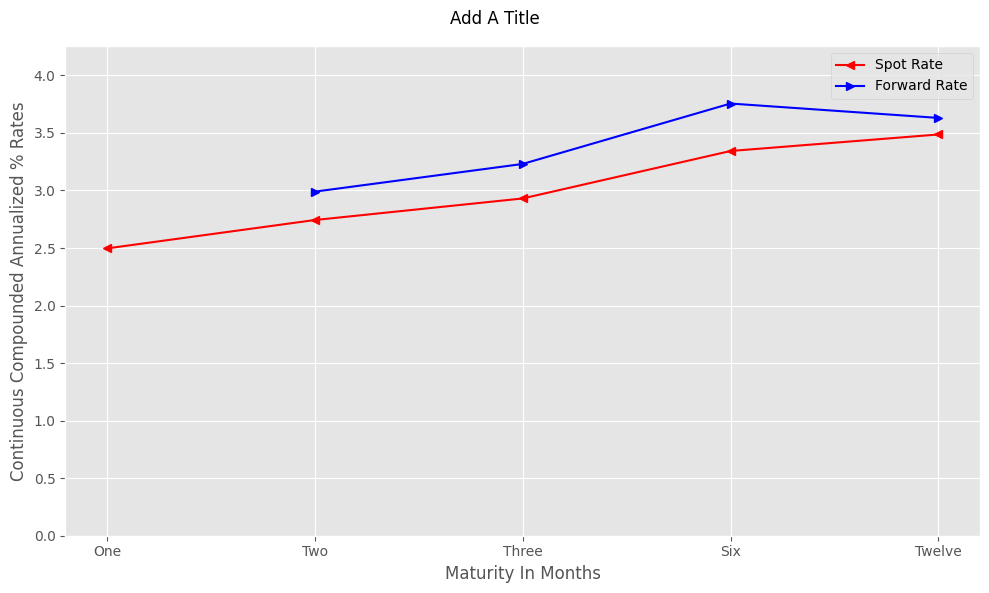

In [ ]:
# Define the labels for the x-axis, representing different maturities.
xaxis = ['One', 'Two', 'Three', 'Six', 'Twelve']

# Define the specific date for which the term structure will be plotted.
string_date = '09/15/2022'

# Get the integer location (row index) of the specified 'string_date' in the DataFrame's index..
loc = Tbill_data_site.index.get_indexer([string_date])[0]

# Prepare the data to be plotted on the y-axis (as %).
data = [spot_rates[loc]*100, forward_rates[loc]*100]

# Attempt to extract the plot title from the file name.
try:
    title = os.path.splitext(save_config['File'])[0]
#'File Name' key not found or string is too short), set a default title.
except:
    title = 'September 15, 2022'

# Define the names for the data series that will appear in the plot's legend.
series = ['Spot Rate', 'Forward Rate']

# Define the label for the y-axis.
ylabel = 'Continuous Compounded Annualized % Rates'

# Define the label for the x-axis.
xlabel = 'Maturity In Months'

#'data' contains two series (spot and forward rates).
x = len(data)

# Define markers for the plot.
markers = ['<','>']*round(x/2+x%2+0.001)

# Define the lower bound for the y-axis.
lower = 0

# Define the upper bound for the y-axis.
# considering NaN values (not a number) and adds a small buffer (0.5) for padding.
upper = max(np.nanmax(data[0]), np.nanmax(data[1])) + 0.5

# Define the y-axis limits (minimum and maximum values).
ylim = [lower, upper]

# Define the size of the plot (width, height) in inches.
size = (10, 6)
# Define colors as red and blue
colors=['r','b']
# This function generates and possibly saves a plot.
one_y_axis(xaxis, data, title, series, xlabel, ylabel, markers, size, ylim,
           save_config=save_config,colors=colors)

## ***Accessing the T-Bill Data Directly from the US Department of the Treasury (Treasury)***
#### <br>**Figure 2** shows a screenshot of the Treasury page and its data tool. A selected time period determines a URL to the Download CSV link.  In our example the year is set to 2025 and the month is September. As we will see below, the URL includes the sting of a four digit year and a two digit month ('202509').

#### The link to the [Daily Treasury Bill Rates on the Treasury Site](https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Figure 2. Accessing T-bill rates**

<img  src='https://docs.google.com/drawings/d/e/2PACX-1vTiHivEYXBe1dqoYji4_KM859JuQ5eyt5zeOOq59grAnhoJFY-Cg-7q610W0YZvPJ9cL7Vi22uC-5me/pub?w=960&h=720'><img>
Source: "Daily Treasury Bill Rates," US Department of the Treasury, 2025 (accessed Sept. 24, 2025)



## ***Changing The URL And Using The Pandas Method <font color='green'>read_csv</font>***
#### The data is accessed directly from the Treasury as a CSV file, and the code below displays the data row for September 30, 2025. With the exception of the URL value and the <font color='green'>read_csv</font> versus <font color='green'>read_excel</font>, the code is identical to what we used to create <font color='green'>Tbill_data_excel</font>. In this example, the URL points to a Treasury site instead of DropBox.  The URL is copied by right clicking the Download CSV link on the Treasury site.  The URL for a particular year and month is shown below. <font color='green'>data_date</font> is assigned the string '202509'.  You can assign it any year and month after 2022. As of November 3 2025, dates prior to 2022 will be moved to a historical page.



```
data_date='202509'
url='https://home.treasury.gov/resource-center/data-chart-center/\
interest-rates/daily-treasury-rates.csv/all/'+data_date+'?\
type=daily_treasury_bill_rates&field_tdr_date_value_month=+'data_date'+&page&_format=csv'
```

#### The csv file is descending order of the dates.  The first row is for September 30$^{th}$ and is displayed with <font color='green'>iloc[0]</font>



In [ ]:
#Read the csv file from the U.S. Treasury website
#Construct the full file path.
data_date='202509'
url='https://home.treasury.gov/resource-center/data-chart-center/\
interest-rates/daily-treasury-rates.csv/all/'+data_date+'?\
type=daily_treasury_bill_rates&field_tdr_date_value_month='+data_date+'&page&_format=csv'
print(f"Attempting to load data from {url}")

#Load the data from csv, using the Date column as the index.
try:
    Tbill_data_site = pd.read_csv(url,index_col='Date')
    # display September 30, 2025 data
    display(Tbill_data_site.iloc[0])

except FileNotFoundError:
    display("\nERROR: File not found.")
    display("Please check that the 'URL' address")

Attempting to load data from https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/all/202509?type=daily_treasury_bill_rates&field_tdr_date_value_month=202509&page&_format=csv


,09/30/2025
4 WEEKS BANK DISCOUNT,4.05
4 WEEKS COUPON EQUIVALENT,4.12
6 WEEKS BANK DISCOUNT,4.02
6 WEEKS COUPON EQUIVALENT,4.10
8 WEEKS BANK DISCOUNT,4.00
8 WEEKS COUPON EQUIVALENT,4.08
13 WEEKS BANK DISCOUNT,3.86
13 WEEKS COUPON EQUIVALENT,3.95
17 WEEKS BANK DISCOUNT,3.83
17 WEEKS COUPON EQUIVALENT,3.93




### <font color='blue'> ***Application: Downloading Treasury Data***</font>

### <font color='blue'>***Access September 2024 T-Bill Data from the US Treasury and display the values for September 12, 2024.***
[***Hint Download U.S. Treasury data September 2024***](https://patrickjhess.github.io/Hints-Results/Chapter_One_Hints.html#download-data-for-september-2024-from-the-u-s-treasury-and-display-the-values-for-september-12-2024)

[***Expected Results***](https://patrickjhess.github.io/Hints-Results/Chapter_One_Results.html#download-data-for-september-2024-from-the-u-s-treasury-and-display-the-values-for-september-12-2024)


## ***Using the CSV File to Calculate Term Structure***


In [ ]:
# Create a list called 'desired_columns' using a list comprehension.
desired_columns = [column for column in Tbill_data_site.columns if 'BANK' in column]

# Create a DataFrame named 'df_bankers_discount'.
df_bankers_discount = Tbill_data_site[desired_columns]

# Display the first 5 rows of the newly created 'df_bankers_discount' DataFrame.
df_bankers_discount[:5]

,4 WEEKS BANK DISCOUNT,6 WEEKS BANK DISCOUNT,8 WEEKS BANK DISCOUNT,13 WEEKS BANK DISCOUNT,17 WEEKS BANK DISCOUNT,26 WEEKS BANK DISCOUNT,52 WEEKS BANK DISCOUNT
Date,,,,,,,
09/30/2025,4.05,4.02,4.00,3.86,3.83,3.72,3.53
09/29/2025,4.06,4.03,4.00,3.86,3.83,3.73,3.52
09/26/2025,4.07,4.03,4.00,3.87,3.83,3.74,3.53
09/25/2025,4.08,4.03,4.01,3.89,3.84,3.75,3.54
09/24/2025,4.02,4.02,3.98,3.87,3.81,3.72,3.49


In [ ]:
# The .to_numpy() method strips away the pandas Index and column headers,
# leaving only the raw data values in a highly efficient array format.
bankers_discount=df_bankers_discount.to_numpy()

# --- Verification Step: Display the First 5 Rows of the New Array ---
# After a data type conversion, it is good practice to inspect the result.
bankers_discount[:5]

array([[4.05, 4.02, 4.  , 3.86, 3.83, 3.72, 3.53],
       [4.06, 4.03, 4.  , 3.86, 3.83, 3.73, 3.52],
       [4.07, 4.03, 4.  , 3.87, 3.83, 3.74, 3.53],
       [4.08, 4.03, 4.01, 3.89, 3.84, 3.75, 3.54],
       [4.02, 4.02, 3.98, 3.87, 3.81, 3.72, 3.49]])

### ***Going from Bankers Discounts to Zero Prices***


In [ ]:
maturity_days=np.array([4*7,6*7,8*7,13*7,17*7,26*7,52*7]) #Maturity in days calculated
#The price formula divides maturity days by 360 to annualize
#Then divides by 100 to convert to a bill paying one dollar.
zero_prices_one=(100-bankers_discount*maturity_days/360)/100
#NumPy performs element by element calculations: a calculation for each
#value of maturity_days with the corresponding value of bankers_discount
zero_prices_one[:5]   #Display first 5 rows (each row is a trading day for Sept 2025)

array([[0.99685   , 0.99531   , 0.99377778, 0.99024278, 0.98733972,
        0.98119333, 0.96430778],
       [0.99684222, 0.99529833, 0.99377778, 0.99024278, 0.98733972,
        0.98114278, 0.96440889],
       [0.99683444, 0.99529833, 0.99377778, 0.9902175 , 0.98733972,
        0.98109222, 0.96430778],
       [0.99682667, 0.99529833, 0.99376222, 0.99016694, 0.98730667,
        0.98104167, 0.96420667],
       [0.99687333, 0.99531   , 0.99380889, 0.9902175 , 0.98740583,
        0.98119333, 0.96471222]])

### ***Spot Rates***

In [ ]:
spot_rates=-np.log(zero_prices_one)/(maturity_days/365) #Maturity_days divided by 365
spot_rates[:5] #Display first 5 rows (last 5 trading days of Sept 2025)

array([[0.04112731, 0.04085421, 0.04068225, 0.03932829, 0.03907985,
        0.03807584, 0.03644461],
       [0.04122902, 0.04095608, 0.04068225, 0.03932829, 0.03907985,
        0.03817917, 0.03633948],
       [0.04133073, 0.04095608, 0.04068225, 0.03943068, 0.03907985,
        0.03828251, 0.03644461],
       [0.04143244, 0.04095608, 0.04078428, 0.03963547, 0.03918254,
        0.03838586, 0.03654976],
       [0.04082219, 0.04085421, 0.04047821, 0.03943068, 0.03887448,
        0.03807584, 0.03602413]])

### ***Forward Rates***


In [ ]:
forward_rates=-np.diff(np.log(zero_prices_one))*365/np.diff(maturity_days) #Sign switched
forward_rates=np.insert(forward_rates,0,np.nan,axis=1) #NumPy nan inserted for first month
forward_rates[:5]

array([[       nan, 0.04030802, 0.04016638, 0.03716195, 0.03827242,
        0.03617937, 0.03481338],
       [       nan, 0.0404102 , 0.03986078, 0.03716195, 0.03827242,
        0.0364779 , 0.03449978],
       [       nan, 0.04020678, 0.03986078, 0.03742816, 0.03793965,
        0.03677644, 0.03460671],
       [       nan, 0.04000335, 0.04026888, 0.03779737, 0.03771053,
        0.03688102, 0.03471366],
       [       nan, 0.04091826, 0.03935021, 0.03775464, 0.03706682,
        0.0365673 , 0.03397243]])

### ***Preparing the Notebook***


In [ ]:
parent,folder,subfolder=parent_folder_subfolder()

### **✅ Parent Directory.../content/drive/MyDrive**

###  **❌ No  Folder**

### **❌ No Subfolder**

## ***Graphing the Term Structure***





In [ ]:
save_config={}

'''
save_config['Parent']=parent
save_config['Folder']=folder
save_config['Subfolder']=subfolder
save_config['File']='T-Bill Term Structure: 9-15-2022.pdf'
'''

### ***Graphing the Spot and Forward Rates for September 30, 2025***
#### The September 2022 T-Bill data had five maturity dates.  The September 2025 data has two additional dates: '6 WEEKS' and '17 WEEKS'. In the following code, the *x*-axis is set at the seven maturities of the bills in months. Forward and spot rates are calculated for the month of September 2025, and the data for September 30, 2025, is plotted.

```
xaxis=['One','One & Half','Two','Three','Four','Six','Twelve']
string_date='09/15/2022'
```

#### The first row of spot_rates and forward_rates correspond to September 30.The spot- and forward-rate rows for September 30, 2025, are then multiplied by 100 and assigned to the list <font color='green'>data</font>.
```
data=[spot_rates[0]*100,forward_rates[0]*100]
```

#### The plot title is assigned whatever value is assigned to <font color='green'>save_config['File Name']</font> (minus the PDF extension).
```
try:                    
  title = os.path.splitext(save_config['File'])              
except:
  title='September 30, 2025'
```
#### Series names, labels, and markers are then assigned.

```
series = ['Spot Rate', 'Forward Rate']
ylabel = 'Continuous Compounded Annualized % Rates'
xlabel = 'Maturity In Months'
x = len(data)
markers = ['<','>']*round(x/2+x%2+0.001)
```

#### The upper limit of the *y*-axis is assigned to <font color='green'>upper</font> and calculated from the maximum value of the spot and forward rates. The NumPy method <font color='green'>nanmax()</font> ignores <font color='green'>nan</font> values. The maximum of <font color='green'>nanmax()</font> of spot rates (<font color='green'>data[0]</font>) and forward rates (<font color='green'>data[1]</font>) plus 0.5% are assigned to <font color='green'>upper </font>. The lower limit is set to 0, and the size and colors of the lines are set as 10 inches wide and 6 inches tall (10,6) and red and blue, respectively.



```
lower = 0
upper = max(np.nanmax(data[0]), np.nanmax(data[1])) + 0.5
ylim = [lower, upper]
size = (10, 6)
colors=['r','b']
```
#### Finally, the graph is generated and saved with <font color='green'>one_y_axis()</font> (see **Figure 3**).

```
one_y_axis(xaxis, data, title, series, xlabel, ylabel, markers, size, ylim,
           save_config=save_config,colors=colors)
```


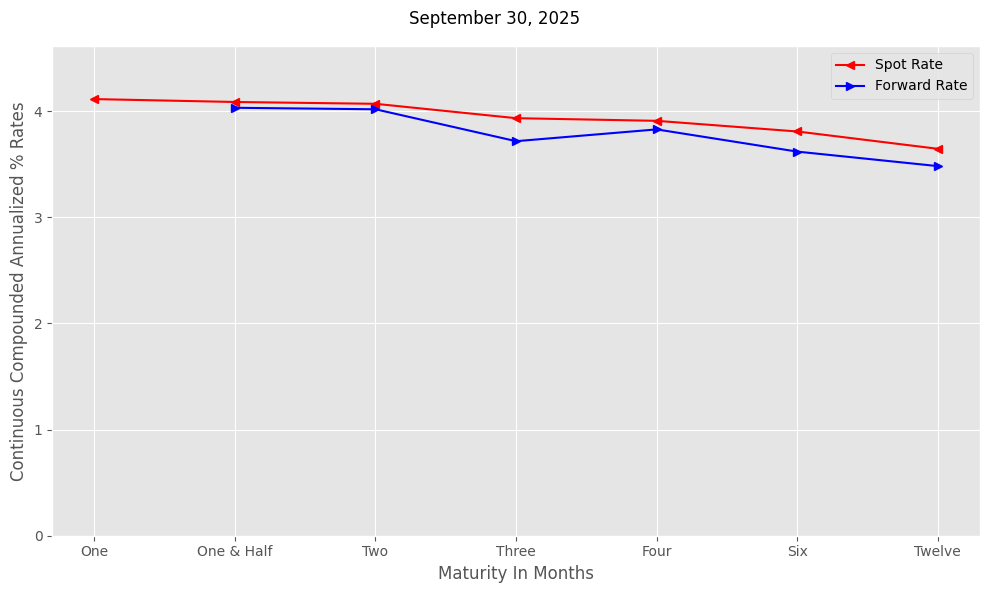

In [ ]:
# Define the labels for the x-axis, representing different maturities.
xaxis = ['One','One & Half', 'Two', 'Three','Four', 'Six', 'Twelve']

# Define the specific date for which the term structure will be plotted.
string_date = '09/30/2022'


# Prepare the data to be plotted on the y-axis (as %).
data = [spot_rates[0]*100, forward_rates[0]*100]

# Attempt to extract the plot title from the file name.
try:
    title = os.path.splitext(save_config['File'])[0]
#'File Name' key not found or string is too short), set a default title.
except:
    title = 'September 30, 2025'

# Define the names for the data series that will appear in the plot's legend.
series = ['Spot Rate', 'Forward Rate']

# Define the label for the y-axis.
ylabel = 'Continuous Compounded Annualized % Rates'

# Define the label for the x-axis.
xlabel = 'Maturity In Months'

#'data' contains two series (spot and forward rates).
x = len(data)

# Define markers for the plot.
markers = ['<','>']*round(x/2+x%2+0.001)

# Define the lower bound for the y-axis.
lower = 0

# Define the upper bound for the y-axis.
# considering NaN values (not a number) and adds a small buffer (0.5) for padding.
upper = max(np.nanmax(data[0]), np.nanmax(data[1])) + 0.5

# Define the y-axis limits (minimum and maximum values).
ylim = [lower, upper]

# Define the size of the plot (width, height) in inches.
size = (10, 6)
# Define colors as red and blue
colors=['r','b']
# This function generates and possibly saves a plot.
one_y_axis(xaxis, data, title, series, xlabel, ylabel, markers, size, ylim,
           save_config=save_config,colors=colors)

### ***Python, Pandas, NumPy And Financial Insights***
#### Using Pandas and NumPy, the term structure of interest rates was calculated for September 15$^{th}$ 2022, and September 30$^{th}$ 2025. These term structures reveal an economy in transition. On September 15$^{th}$ 2022, rates were increasing with maturity and expected to continue rising. By September 30$^{th}$ 2025 the pattern had shifted. Although the overall level of rates was higher on September 30$^{th}$ 2025, the term structure showed a slight downward slope. These differences indicate two different economic states: inflation was expected to increase in September 2022 but not  in September 2025. The ability to calibrate the term structure of interest rates in this way highlights the utility of Python and its rich ecosystem of libraries.

### ***Summarizing Key Points***

*   ***The present value function describes all bonds as a portfolio of zero-coupon bonds.***
*   ***Data was accessed directly from the Treasury as a CSV file and assigned to a Pandas Dataframe.***
*   ***The term structure of interest rates describes the behavior of spot and forward interest rates.***
*   ***The term structure of interest rates was calculated with T-bills for September 2022.***
*   ***The term structure was graphed for September 15, 2022 and September 30, 2025.***





# ***<font color='blue'>Exercise:  Using the September 12, 2024, data***</font>


1. ### <font color='blue'>***Calculate spot and forward rates.***</font>
2. ### <font color='blue'>***Plot the spot and forward rates.***</font>

[***Hints***](https://patrickjhess.github.io/Hints-Results/Chapter_One_Hints.html#chapter-one-exercise)

[***Expected Results***](https://patrickjhess.github.io/Hints-Results/Chapter_One_Results.html#chapter-one-exercise)
